# 04 Surface normal - Multi-process

* 기존 예제에서 for loop을 제거하고 multi-process를 적용하여 가속하는 예제입니다.

In [1]:
import multiprocessing as mp
from functools import partial

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

from _04_surface_normal import compute_ray_color

In [2]:
# image
aspect_ratio = 16.0 / 9.0
image_width = 320
image_height = int(image_width / aspect_ratio)

In [3]:
# camera
viewport_height = 2.0
viewport_width = aspect_ratio * viewport_height
focal_length = 1.0

camera_origin = np.array([0.0, 0.0, 0.0])
horizontal_vec = np.array([viewport_width, 0.0, 0.0])
vertical_vec = np.array([0.0, viewport_height, 0.0])
frontal_vec = np.array([0.0, 0.0, focal_length])
lower_left_corner = (
    camera_origin - horizontal_vec / 2.0 - vertical_vec / 2.0 - frontal_vec
)

In [4]:
uv_list = []
for row in range(image_height):
    for col in range(image_width):
        u = float(col) / (image_width - 1)
        v = float(row) / (image_height - 1)
        uv_list.append((u, v))

In [5]:
%%time

compute_ray_color_func = partial(
    compute_ray_color, 
    camera_origin=camera_origin, 
    horizontal_vec=horizontal_vec, 
    vertical_vec=vertical_vec, 
    lower_left_corner=lower_left_corner)

with mp.Pool(processes=4) as pool:
    output_list = pool.map(compute_ray_color_func, uv_list)    
    pool.close()
    pool.join()

image = np.array(output_list).reshape(image_height, image_width, 3)

CPU times: total: 109 ms
Wall time: 656 ms


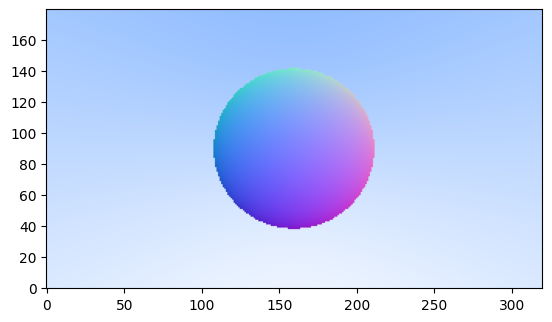

In [6]:
plt.imshow(image, origin='lower')
plt.show()